In [1]:
# Dependencies
import tweepy
import json
import seaborn as sns
import pandas as pd
from config import consumer_key, consumer_secret, access_token, access_token_secret

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [2]:
target_users = ("@BBC","@CBS","@CNN","@FoxNews","@nytimes")

# Tweet Texts
tweet_texts = []

# List to hold results
results_list = []

#Loop through all news organizations
for target in target_users:

    # Variables for holding sentiments
    compound_list = []
    positive_list = []
    negative_list = []
    neutral_list = []
    number_list = []
    
    counter = 0
    
    # Create a loop to iteratively run API requests
    for x in range(1, 6):

        # Get all tweets from home feed (for each page specified)
        public_tweets = api.user_timeline(target, page=x)

        # Loop through all tweets
        for tweet in public_tweets:
            
            # Run Vader Analysis on each tweet
            results = analyzer.polarity_scores(tweet["text"])
            compound = results["compound"]
            pos = results["pos"]
            neu = results["neu"]
            neg = results["neg"]
            
            # Add each value to the appropriate list
            compound_list.append(compound)
            positive_list.append(pos)
            negative_list.append(neg)
            neutral_list.append(neu)
            counter += 1
            number_list.append(counter)
            
    sent ={
        "User": target,
        "Compound": compound_list,
        "Positive": positive_list,
        "Neutral": negative_list,
        "Negative": neutral_list,
        "Tweet Count": len(compound_list),
        "Number": number_list
        }
    
    # Append airline results to 'results_list'
    results_list.append(sent)
            

In [3]:
#BBCNews
y_bbc = results_list[0]["Compound"]
x_bbc = results_list[0]["Number"]

#CBS
y_cbs = results_list[1]["Compound"]
x_cbs = results_list[1]["Number"]

#CNN
y_cnn = results_list[2]["Compound"]
x_cnn = results_list[2]["Number"]

#FOXNews
y_fox = results_list[3]["Compound"]
x_fox = results_list[3]["Number"]

#nytimes
y_nyt = results_list[4]["Compound"]
x_nyt = results_list[4]["Number"]

In [4]:
news_df = pd.DataFrame(results_list).set_index("User")
news_df

,Compound,Negative,Neutral,Number,Positive,Tweet Count
User,,,,,,
@BBC,"[-0.4927, -0.5106, 0.0, 0.0, 0.0, 0.4227, 0.67...","[0.842, 0.784, 1.0, 1.0, 1.0, 0.514, 0.726, 0....","[0.158, 0.216, 0.0, 0.0, 0.0, 0.15, 0.066, 0.0...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.336, 0.208, 0.237,...",100
@CBS,"[0.6124, 0.6976, 0.6597, 0.0, 0.0, 0.2732, 0.6...","[0.688, 0.747, 0.779, 1.0, 1.0, 0.784, 0.786, ...","[0.064, 0.0, 0.0, 0.0, 0.0, 0.086, 0.0, 0.0, 0...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[0.248, 0.253, 0.221, 0.0, 0.0, 0.129, 0.214, ...",100
@CNN,"[-0.2263, 0.3182, -0.3612, 0.0516, 0.0, -0.102...","[0.894, 0.881, 0.681, 0.769, 1.0, 0.928, 0.747...","[0.106, 0.0, 0.213, 0.111, 0.0, 0.072, 0.0, 0....","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[0.0, 0.119, 0.106, 0.12, 0.0, 0.0, 0.253, 0.0...",100
@FoxNews,"[0.3415, 0.2263, 0.765, 0.0, 0.5709, 0.6249, 0...","[0.789, 0.909, 0.631, 1.0, 0.802, 0.806, 1.0, ...","[0.053, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[0.158, 0.091, 0.369, 0.0, 0.198, 0.194, 0.0, ...",100
@nytimes,"[0.1027, 0.0, 0.0, 0.0, 0.4215, -0.7003, -0.07...","[0.935, 0.746, 1.0, 1.0, 0.676, 0.621, 0.929, ...","[0.0, 0.127, 0.0, 0.0, 0.0, 0.29, 0.071, 0.0, ...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[0.065, 0.127, 0.0, 0.0, 0.324, 0.09, 0.0, 0.1...",100


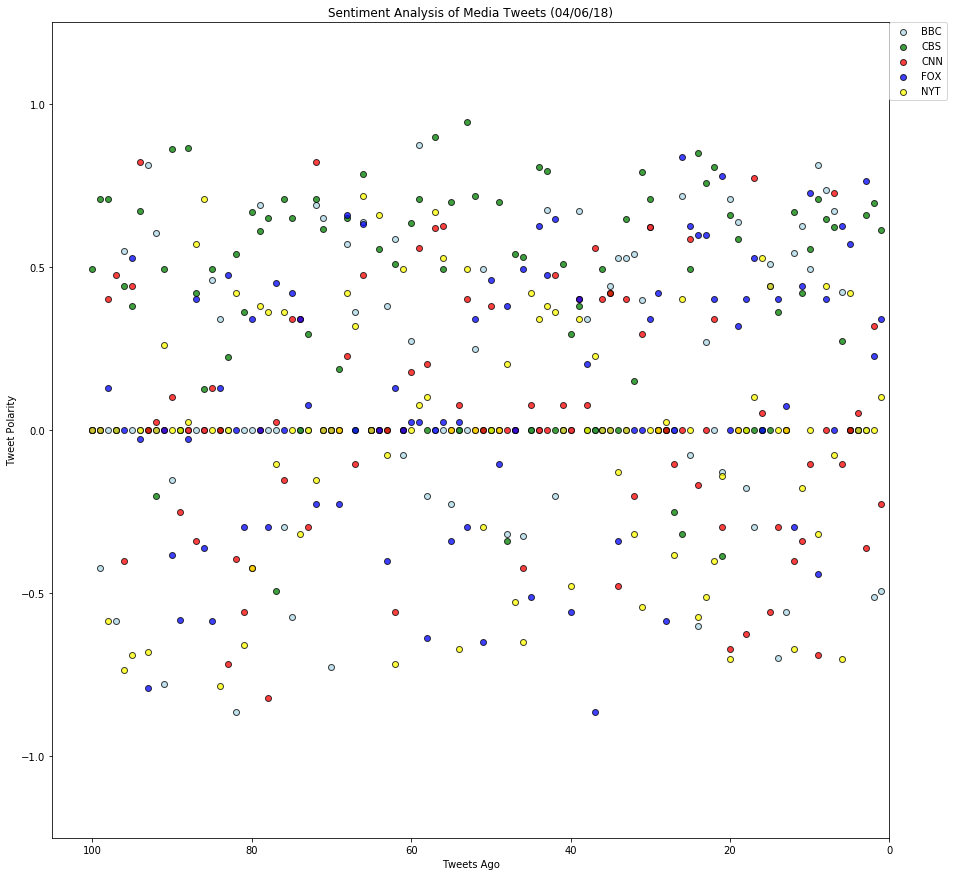

In [10]:
import matplotlib.pyplot as plt

fix, ax  = plt.subplots(figsize =(15,15))

plt.ylim(-1.25,1.25)
plt.xlim(105,0)

plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")
plt.title("Sentiment Analysis of Media Tweets (04/06/18)")

plt.scatter(x_bbc, y_bbc, marker="o", facecolors="lightblue", edgecolors="black", alpha=.75, label='BBC')
plt.scatter(x_cbs, y_cbs, marker="o", facecolors="green", edgecolors="black", alpha=0.75, label="CBS")
plt.scatter(x_cnn, y_cnn, marker="o", facecolors="red", edgecolors="black", alpha=0.75, label="CNN")
plt.scatter(x_fox, y_fox, marker="o", facecolors="blue", edgecolors="black", alpha=0.75, label="FOX")
plt.scatter(x_nyt, y_nyt, marker="o", facecolors="yellow", edgecolors="black", alpha=0.75, label="NYT")
plt.legend(bbox_to_anchor=(1,1), loc=2, borderaxespad=0)
plt.show()

In [19]:
#seaborn
%matplotlib inline

sns.lmplot(x=y_bbc, y=x_bbc)

TypeError: lmplot() missing 1 required positional argument: 'data'